In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dengue_labels = pd.read_csv('../data/dengue_labels_train.csv')
dengue_features = pd.read_csv('../data/dengue_features_train.csv')

merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [130]:
#merged_df.describe()
rows_with_missing_values = merged_df[merged_df.isna().any(axis=1)]
#rows_with_missing_values
merged_df = merged_df.drop('week_start_date',axis=1,errors='ignore')
merged_df

,city,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,5,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,8,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,1,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,1,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [131]:
merged_df.head()

,city,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [210]:
# Clean data
merged_df
for col in merged_df.columns[4:]:
    print(col)
    meanOfRow = merged_df.loc[:,col].mean()
    print("mean: ", meanOfRow)
    rowIndex = merged_df.columns.get_loc(col)
    for index, row in enumerate(merged_df[col]):
        if pd.isna(merged_df.iloc[index,rowIndex]):
            merged_df.iloc[index,rowIndex] = meanOfRow
merged_df

IndexError: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 23

In [133]:
from sklearn.preprocessing import MinMaxScaler

cols_to_normalise = ["precipitation_amt_mm",
                    "reanalysis_air_temp_k", "reanalysis_avg_temp_k", "reanalysis_dew_point_temp_k",
                    "reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k",
                    "reanalysis_precip_amt_kg_per_m2", "reanalysis_relative_humidity_percent",
                    "reanalysis_sat_precip_amt_mm", "reanalysis_specific_humidity_g_per_kg",
                    "reanalysis_tdtr_k", "station_avg_temp_c", "station_diur_temp_rng_c",
                    "station_max_temp_c", "station_min_temp_c", "station_precip_mm"]
scaler = MinMaxScaler()
merged_df[cols_to_normalise] = scaler.fit_transform(merged_df[cols_to_normalise])
merged_df

,city,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,0.122600,0.103725,0.198483,0.177617,0.031797,0.388291,...,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,sj,1990,19,5,0.169900,0.142175,0.162357,0.155486,0.058423,0.472710,...,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,sj,1990,20,4,0.032250,0.172967,0.157200,0.170843,0.088428,0.548064,...,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,sj,1990,21,3,0.128633,0.245067,0.227557,0.235886,0.039324,0.575260,...,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,sj,1990,22,6,0.196200,0.262200,0.251200,0.247340,0.019252,0.645515,...,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,5,0.342750,0.318900,0.256343,0.292514,0.141577,0.621152,...,0.078878,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696
1452,iq,2010,22,8,0.160157,0.160371,0.136043,0.225657,0.221377,0.488385,...,0.363015,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366
1453,iq,2010,23,1,0.247057,0.146057,0.250357,0.233714,0.150896,0.259490,...,0.088694,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620
1454,iq,2010,24,1,0.333914,0.245771,0.278886,0.325486,0.152765,0.226062,...,0.109255,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450


In [134]:
from sklearn.preprocessing import OrdinalEncoder

categorical_feature = ["city"]

cities = merged_df[categorical_feature]
encoder = OrdinalEncoder()
encoded_cities = encoder.fit_transform(cities)
merged_df[categorical_feature] = encoded_cities
merged_df[categorical_feature].value_counts()
merged_df

,city,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,1990,18,4,0.122600,0.103725,0.198483,0.177617,0.031797,0.388291,...,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,1.0,1990,19,5,0.169900,0.142175,0.162357,0.155486,0.058423,0.472710,...,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,1.0,1990,20,4,0.032250,0.172967,0.157200,0.170843,0.088428,0.548064,...,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,1.0,1990,21,3,0.128633,0.245067,0.227557,0.235886,0.039324,0.575260,...,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,1.0,1990,22,6,0.196200,0.262200,0.251200,0.247340,0.019252,0.645515,...,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,5,0.342750,0.318900,0.256343,0.292514,0.141577,0.621152,...,0.078878,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696
1452,0.0,2010,22,8,0.160157,0.160371,0.136043,0.225657,0.221377,0.488385,...,0.363015,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366
1453,0.0,2010,23,1,0.247057,0.146057,0.250357,0.233714,0.150896,0.259490,...,0.088694,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620
1454,0.0,2010,24,1,0.333914,0.245771,0.278886,0.325486,0.152765,0.226062,...,0.109255,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450


In [135]:

X = merged_df[['city','year','weekofyear']]
y = merged_df['total_cases']
merged_df = merged_df.drop('total_cases',axis=1,errors='ignore')

X.shape, y.shape

((1456, 3), (1456,))

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [199]:
from sklearn.ensemble import RandomForestRegressor
#  {'n_estimators': 450, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1}
rfr = RandomForestRegressor(
                            n_estimators = 450,
                            max_depth = 38,
                            min_samples_split = 3,
                            min_samples_leaf = 1)
rows_with_missing_values = merged_df[merged_df.isna().any(axis=1)]
rows_with_missing_values

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


In [200]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=38, min_samples_split=3, n_estimators=450)

In [201]:
rfr.feature_importances_

array([0.01596915, 0.58077392, 0.40325693])

In [202]:
y_pred = rfr.predict(X_test)

In [203]:
y_pred

for i in range(len(X_test)):
    true_label = y_test.iloc[i]
    predicted_label = y_pred[i]
    print(f"True y: {true_label} Predicted y: {predicted_label}")

True y: 43 Predicted y: 37.09665608465609
True y: 6 Predicted y: 1.91110052910053
True y: 38 Predicted y: 31.034534391534404
True y: 7 Predicted y: 6.2919285714285715
True y: 10 Predicted y: 6.296111111111112
True y: 22 Predicted y: 14.41378306878307
True y: 42 Predicted y: 46.625931216931214
True y: 9 Predicted y: 10.889883597883596
True y: 5 Predicted y: 5.433714285714285
True y: 8 Predicted y: 10.496719576719574
True y: 0 Predicted y: 0.2476666666666667
True y: 37 Predicted y: 31.86556084656084
True y: 26 Predicted y: 23.93050264550265
True y: 8 Predicted y: 9.850629629629628
True y: 22 Predicted y: 31.979931216931227
True y: 22 Predicted y: 6.25325925925926
True y: 16 Predicted y: 18.11928042328043
True y: 5 Predicted y: 6.461902116402114
True y: 8 Predicted y: 5.492730158730159
True y: 60 Predicted y: 60.33774074074076
True y: 11 Predicted y: 7.954851851851851
True y: 59 Predicted y: 19.26688888888889
True y: 10 Predicted y: 7.443666666666669
True y: 15 Predicted y: 13.87283068783

497      43
1261      6
411      38
1046      7
1033     10
       ... 
602      47
243     154
493      46
915      17
727       6
Name: total_cases, Length: 364, dtype: int64


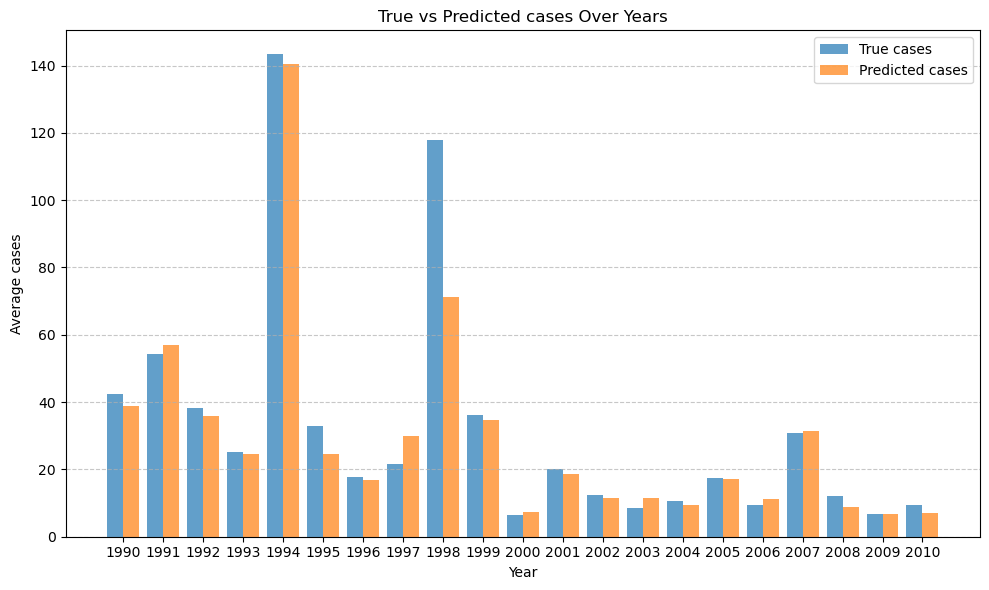

In [204]:
years = X_test['year'].unique()
true_labels = [y_test[X_test['year'] == year].mean() for year in years]
print(y_test)
predicted_labels = [y_pred[X_test['year'] == year].mean() for year in years]
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years - 0.2, true_labels, width=0.4, label='True cases', alpha=0.7)
ax.bar(years + 0.2, predicted_labels, width=0.4, label='Predicted cases', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Average cases')
ax.set_title('True vs Predicted cases Over Years')

ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(years)
ax.set_xticklabels(years.astype(int))
plt.tight_layout()

plt.show()

In [205]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

7.9591370250120255

In [206]:
merged_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,1990,18,0.122600,0.103725,0.198483,0.177617,0.031797,0.388291,0.354667,...,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,1.0,1990,19,0.169900,0.142175,0.162357,0.155486,0.058423,0.472710,0.441778,...,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,1.0,1990,20,0.032250,0.172967,0.157200,0.170843,0.088428,0.548064,0.496000,...,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,1.0,1990,21,0.128633,0.245067,0.227557,0.235886,0.039324,0.575260,0.539556,...,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,1.0,1990,22,0.196200,0.262200,0.251200,0.247340,0.019252,0.645515,0.593778,...,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676


In [191]:
# Fine Tuning Random Forest Regressor arguments

import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 2, 40)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    

    
    rfr = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)

    rfr.fit(X_train, y_train)


    y_pred = rfr.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)

    return mae


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)

[I 2024-03-10 22:30:15,661] A new study created in memory with name: no-name-8ae60028-06ad-4386-b4fe-1f1130a884f0
[I 2024-03-10 22:30:16,239] Trial 0 finished with value: 17.040344149445097 and parameters: {'n_estimators': 350, 'max_depth': 29, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 0 with value: 17.040344149445097.
[I 2024-03-10 22:30:17,716] Trial 1 finished with value: 15.869900387570192 and parameters: {'n_estimators': 800, 'max_depth': 37, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 1 with value: 15.869900387570192.
[I 2024-03-10 22:30:18,174] Trial 2 finished with value: 15.075900623383511 and parameters: {'n_estimators': 250, 'max_depth': 37, 'min_samples_split': 19, 'min_samples_leaf': 11}. Best is trial 2 with value: 15.075900623383511.
[I 2024-03-10 22:30:21,048] Trial 3 finished with value: 8.373397116052107 and parameters: {'n_estimators': 900, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with v

Best hyperparameters: {'n_estimators': 100, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [207]:
rfr.predict([[0,1991,48]])

C:\Users\Niall\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([152.23532804])

In [208]:
dengue_submission = pd.read_csv('../../../../../Downloads/submission_format.csv')
from sklearn.preprocessing import OrdinalEncoder

categorical_feature = ["city"]

cities = dengue_submission[categorical_feature]
encoder = OrdinalEncoder()
encoded_cities = encoder.fit_transform(cities)
dengue_submission[categorical_feature] = encoded_cities
dengue_submission[categorical_feature].value_counts()

for index,row in  dengue_submission.iterrows():
    city = row['city']
    year = row['year']
    weekofyear = row['weekofyear']
    total_cases = row['total_cases']
    #print(city, year, weekofyear, total_cases)
    case_prediction = rfr.predict([[city,year,weekofyear]])
    dengue_submission.at[index, 'city'] = ("sj" if city == 1.0 else "iq")
    dengue_submission.at[index, 'total_cases'] = int(case_prediction)
dengue_submission


C:\Users\Niall\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Niall\AppData\Local\Temp\ipykernel_75216\3071644858.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'sj' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dengue_submission.at[index, 'city'] = ("sj" if city == 1.0 else "iq")
C:\Users\Niall\AppData\Local\Temp\ipykernel_75216\3071644858.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dengue_submission.at[index, 'total_cases'] = int(case_prediction)
C:\Users\Niall\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py:465: UserWarning: X does n

,city,year,weekofyear,total_cases
0,sj,2008,18,7
1,sj,2008,19,7
2,sj,2008,20,8
3,sj,2008,21,8
4,sj,2008,22,14
...,...,...,...,...
411,iq,2013,22,3
412,iq,2013,23,2
413,iq,2013,24,1
414,iq,2013,25,3


In [209]:
dengue_submission.to_csv('../../../../../Downloads/submission.csv',index = False, header=True,sep=',',encoding='utf-8-sig')